<a href="https://colab.research.google.com/github/Aditya1Jhaveri/cervix-cancer-Deep-learning/blob/main/Efficientnet_b7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/Aditya1Jhaveri/cervix-cancer-Deep-learning.git

Cloning into 'cervix-cancer-Deep-learning'...
remote: Enumerating objects: 23816, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 23816 (delta 16), reused 52 (delta 13), pack-reused 23760
Receiving objects: 100% (23816/23816), 753.00 MiB | 27.82 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Updating files: 100% (23690/23690), done.


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B7_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B7_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-dcc49843.pth" to /root/.cache/torch/hu

epoch,train_loss,valid_loss,accuracy,time
0,1.870322,1.528011,0.487050,01:35


epoch,train_loss,valid_loss,accuracy,time
0,1.399767,1.079674,0.587770,01:52
1,1.244956,0.946052,0.640288,01:51
2,1.160164,0.868786,0.651079,01:51
3,1.013305,0.795172,0.682734,01:51
4,0.931403,0.748764,0.707194,01:50
5,0.838089,0.713498,0.707194,01:50
6,0.757004,0.639109,0.743885,01:50
7,0.740227,0.611061,0.758993,01:50
8,0.683835,0.601314,0.768345,01:50
9,0.666643,0.598779,0.769065,01:50


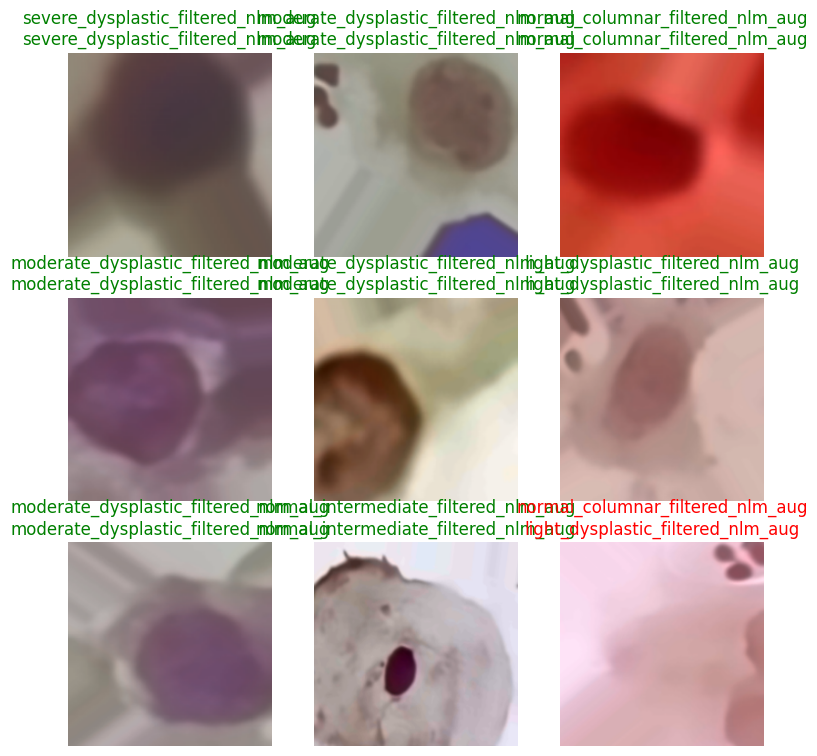

In [3]:
from fastai.vision.all import *

# Define the paths to your training and validation data
train_data_dir = '/content/cervix-cancer-Deep-learning/NLM Augmentation/train'
validation_data_dir = '/content/cervix-cancer-Deep-learning/NLM Augmentation/test'

# Set the image size and batch size
img_width, img_height = 224, 224
batch_size = 32

# Load the data using Fastai's DataLoaders
dls = ImageDataLoaders.from_folder(
    path=train_data_dir,
    train='/content/cervix-cancer-Deep-learning/NLM Augmentation/train',
    valid_pct=0.2,
    item_tfms=Resize(img_width),
    batch_tfms=[*aug_transforms(max_rotate=20, max_warp=0.2, p_affine=1.0, p_lighting=1.0), Normalize.from_stats(*imagenet_stats)],
    bs=batch_size
)

# Load the efficientnet_b0 architecture
arch = efficientnet_b7
learn = cnn_learner(dls, arch, metrics=[accuracy]).to_fp16()  # Use mixed-precision training

# Use gradient accumulation to reduce memory usage
learn.fine_tune(epochs=10, cbs=[GradientAccumulation(4)])

# Show results and plots
learn.show_results()




In [4]:
# Save the model after the first 10 epochs
learn.save('efficientnet_b7')

Path('/content/cervix-cancer-Deep-learning/NLM Augmentation/train/models/efficientnet_b7.pth')

In [5]:
learn.load('efficientnet_b7')

# Continue training for epochs 10 to 25
learn.fine_tune(epochs=25, base_lr=1e-4, cbs=[GradientAccumulation(4)])

epoch,train_loss,valid_loss,accuracy,time
0,0.684007,0.596050,0.772662,01:36


epoch,train_loss,valid_loss,accuracy,time
0,0.677497,0.596225,0.769065,01:50
1,0.683059,0.591229,0.775540,01:51
2,0.648537,0.590535,0.772662,01:50
3,0.651022,0.587008,0.770504,01:50
4,0.661416,0.583624,0.773381,01:50
5,0.677319,0.583710,0.770504,01:50
6,0.685141,0.577932,0.774820,01:50
7,0.673728,0.572649,0.774820,01:50
8,0.668852,0.570492,0.779137,01:50
9,0.625007,0.567682,0.776259,01:51


In [6]:
# Save the model after the first 10 epochs
learn.save('efficientnet_b7 2')

Path('/content/cervix-cancer-Deep-learning/NLM Augmentation/train/models/efficientnet_b7 2.pth')

In [7]:
learn.load('efficientnet_b7 2')

# Continue training for epochs 10 to 25
learn.fine_tune(epochs=25, base_lr=1e-4, cbs=[GradientAccumulation(4)])

epoch,train_loss,valid_loss,accuracy,time
0,0.601464,0.538120,0.791367,01:38


epoch,train_loss,valid_loss,accuracy,time
0,0.609622,0.539760,0.792806,01:50
1,0.619103,0.536744,0.790648,01:51
2,0.606884,0.534126,0.790648,01:50
3,0.604064,0.530038,0.794964,01:50
4,0.623394,0.529049,0.797842,01:51
5,0.604443,0.523849,0.799281,01:51
6,0.595766,0.522057,0.796403,01:51
7,0.599110,0.520619,0.799281,01:51
8,0.580801,0.515413,0.798561,01:51
9,0.576970,0.514037,0.797122,01:51


epoch,train_loss,valid_loss,accuracy,time
0,0.609622,0.539760,0.792806,01:50
1,0.619103,0.536744,0.790648,01:51
2,0.606884,0.534126,0.790648,01:50
3,0.604064,0.530038,0.794964,01:50
4,0.623394,0.529049,0.797842,01:51
5,0.604443,0.523849,0.799281,01:51
6,0.595766,0.522057,0.796403,01:51
7,0.599110,0.520619,0.799281,01:51
8,0.580801,0.515413,0.798561,01:51
9,0.576970,0.514037,0.797122,01:51


In [10]:
learn.save('efficientnet_b7 3')

Path('/content/cervix-cancer-Deep-learning/NLM Augmentation/train/models/efficientnet_b7 3.pth')

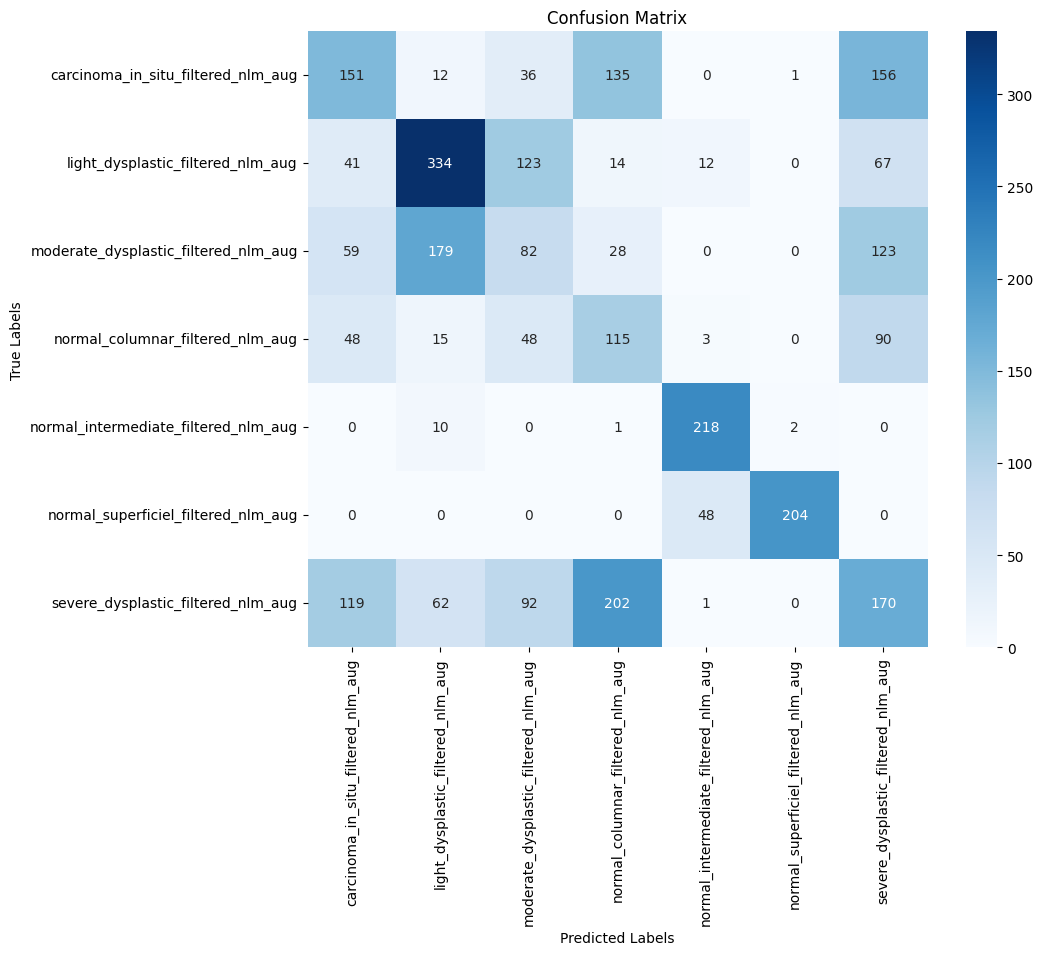

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the test data using Fastai's DataLoader
test_dls = dls.test_dl(
    get_image_files( '/content/cervix-cancer-Deep-learning/NLM Augmentation/test'),  # Replace with the actual path to your test data
    with_labels=True
)

# Get the model predictions on the test data
preds, _ = learn.get_preds(dl=test_dls)

# Convert the predictions to class indices
class_indices = preds.argmax(dim=1).numpy()

# Get the true class indices from the DataLoader
true_classes = [str(path).split('/')[-2] for path in test_dls.items]

# Map class names to numeric labels
class_to_idx = {class_name: idx for idx, class_name in enumerate(dls.vocab)}
true_indices = [class_to_idx[class_name] for class_name in true_classes]

# Generate the confusion matrix
confusion_mat = confusion_matrix(true_indices, class_indices)

# Plot the confusion matrix using seaborn
class_names = dls.vocab
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Calculate accuracy
correct_predictions = (class_indices == true_indices).sum()
total_predictions = len(true_indices)
accuracy = correct_predictions / total_predictions

print(f"Accuracy on test data: {accuracy:.2%}")

Accuracy on test data: 42.45%
